# Available datasets
The 10x visium datasets are already donwloaded and available in `/storage/groups/ml01/datasets/raw/20200909_PublicVisium_giovanni.palla`

You can find the following datasets (`dataset_name` in `dataset_folder`)
  
| Dataset name | Dataset folder | Image Type |
| :----------- | :------------- | :--------- |
| `V1_Human_Lymph_Node` | `20191218_10XVisium_HumanLymphNode_giovanni.palla` | H&E |
| `V1_Breast_Cancer_Block_A_Section_2` | `20191218_10XVisium_BreastCancerBAS2_giovanni.palla` | H&E |
| `V1_Breast_Cancer_Block_A_Section_1` | `20191218_10XVisium_BreastCancerBAS1_giovanni.palla` | H&E |
| `V1_Human_Heart` | `20191218_10XVisium_HumanHeart_giovanni.palla` | H&E |
| `V1_Mouse_Brain_Sagittal_Posterior_Section_2` | `20191205_10XVisium_MouseBrainSerial2SP_giovanni.palla` | H&E |
| `V1_Mouse_Brain_Sagittal_Posterior` | `20191205_10XVisium_MouseBrainSerial1SP_giovanni.palla` | H&E |
| `V1_Mouse_Brain_Sagittal_Anterior_Section_2` | `20191205_10XVisium_MouseBrainSerial2SA_giovanni.palla` | H&E |
| `V1_Mouse_Brain_Sagittal_Anterior` | `20191205_10XVisium_MouseBrainSerial1SA_giovanni.palla` | H&E |
| `V1_Adult_Mouse_Brain` | `20191205_10XVisium_MouseBrainCoronal_giovanni.palla` | H&E |
| `V1_Mouse_Kidney` | `20191205_10XVisium_MouseKidneyCoronal_giovanni.palla` | H&E |
| `V1_Adult_Mouse_Brain_Coronal_Section_2` | `2020_10XFluoVisium_MouseBrain2_giovanni.palla` | Fluorescent |
| `V1_Adult_Mouse_Brain_Coronal_Section_1` | `2020_10XFluoVisium_MouseBrain1_giovanni.palla` | Fluorescent |
| `V1_Human_Brain_Section_2` | `2020_10XFluoVisium_HumanBrain2_giovanni.palla` | Fluorescent |
| `V1_Human_Brain_Section_1` | `2020_10XFluoVisium_HumanBrain1_giovanni.palla` | Fluorescent |

## Load data
- scanpy already contains a loading function which reads the gene expression and downscaled png tissue images in an adata object
- the full resolution tiff image has to be loaded externally

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio

%load_ext autoreload
%autoreload 2
%load_ext lab_black

# path to "raw" dataset folder
BASE_PATH = "/storage/groups/ml01/datasets/raw/20200909_PublicVisium_giovanni.palla"

In [2]:
dataset_name = "V1_Adult_Mouse_Brain"
dataset_folder = os.path.join(
    BASE_PATH, "20191205_10XVisium_MouseBrainCoronal_giovanni.palla"
)

load the data and calculate some basic metrics

In [3]:
adata = sc.read_visium(
    dataset_folder, count_file=f"{dataset_name}_filtered_feature_bc_matrix.h5"
)
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/icb/giovanni.palla/miniconda3/envs/spatools/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


The two spatial features are the following:
- spatial coordinates
- tissue image
They can be found in the following adata slots

The spatial coordinates are stored in `adata.obsm["spatial"]`

In [4]:
adata.obsm["spatial"]

array([[8230, 7237],
       [4170, 1611],
       [2519, 8315],
       ...,
       [3276, 8435],
       [3069, 6639],
       [4720, 2090]])

The tissue images (both hires and lowres png) as well as various scaling factors and metadata are stored in `adata.uns["spatial"]["dataset_name"]`

In [5]:
adata.uns["spatial"]

{'V1_Adult_Mouse_Brain': {'images': {'hires': array([[[0.50980395, 0.52156866, 0.49411765],
           [0.50980395, 0.5176471 , 0.49411765],
           [0.50980395, 0.5176471 , 0.5019608 ],
           ...,
           [0.5019608 , 0.5137255 , 0.49019608],
           [0.5019608 , 0.5137255 , 0.49803922],
           [0.5019608 , 0.50980395, 0.49411765]],
   
          [[0.50980395, 0.5176471 , 0.49803922],
           [0.5137255 , 0.52156866, 0.49411765],
           [0.50980395, 0.5176471 , 0.49803922],
           ...,
           [0.49803922, 0.5137255 , 0.4862745 ],
           [0.49803922, 0.50980395, 0.49411765],
           [0.5019608 , 0.5137255 , 0.5019608 ]],
   
          [[0.5058824 , 0.5176471 , 0.49019608],
           [0.5137255 , 0.52156866, 0.5019608 ],
           [0.5058824 , 0.52156866, 0.5019608 ],
           ...,
           [0.5019608 , 0.5137255 , 0.49803922],
           [0.5019608 , 0.50980395, 0.49411765],
           [0.5058824 , 0.5137255 , 0.49803922]],
   
          ..

As mentioned before, the tiff image needs to be loaded separately.  It's gonna be part of the challenge to reason on how to best analyze and save the image.

In [6]:
tiff = imageio.imread(os.path.join(dataset_folder, f"{dataset_name}_image.tif"))

## Visualize data
Scanpy already provides minimal functionalities to visualize the Visium data with `sc.pl.spatial`.

/home/icb/giovanni.palla/miniconda3/envs/spatools/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


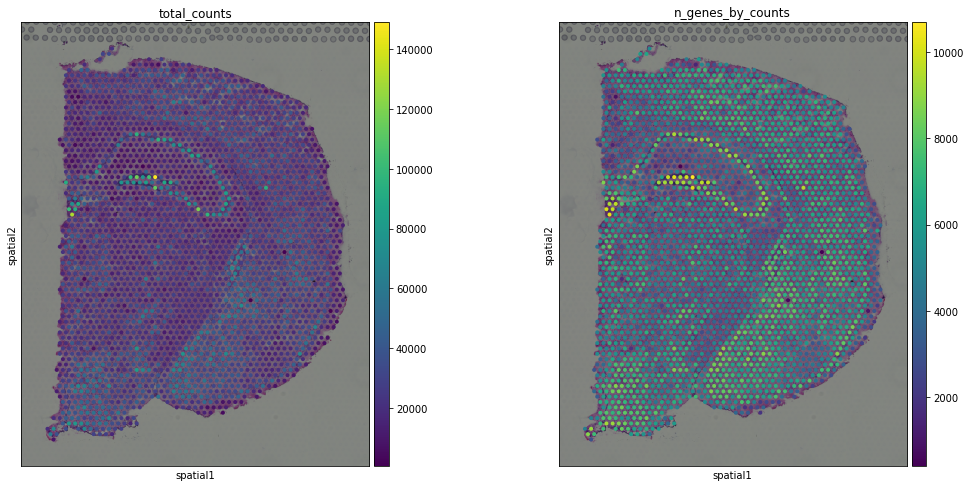

In [7]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

We can also visualize seprately the full resolution tiff image. Let's also crop it to zoom in the details

In [8]:
crop_coord = np.asarray([6000, 6300, 7000, 7500])

img_coord = (
    *crop_coord[:2],
    *np.ceil(tiff.shape[0] - crop_coord[2:4]).astype(int),
)

(4257.0, 4757.0)

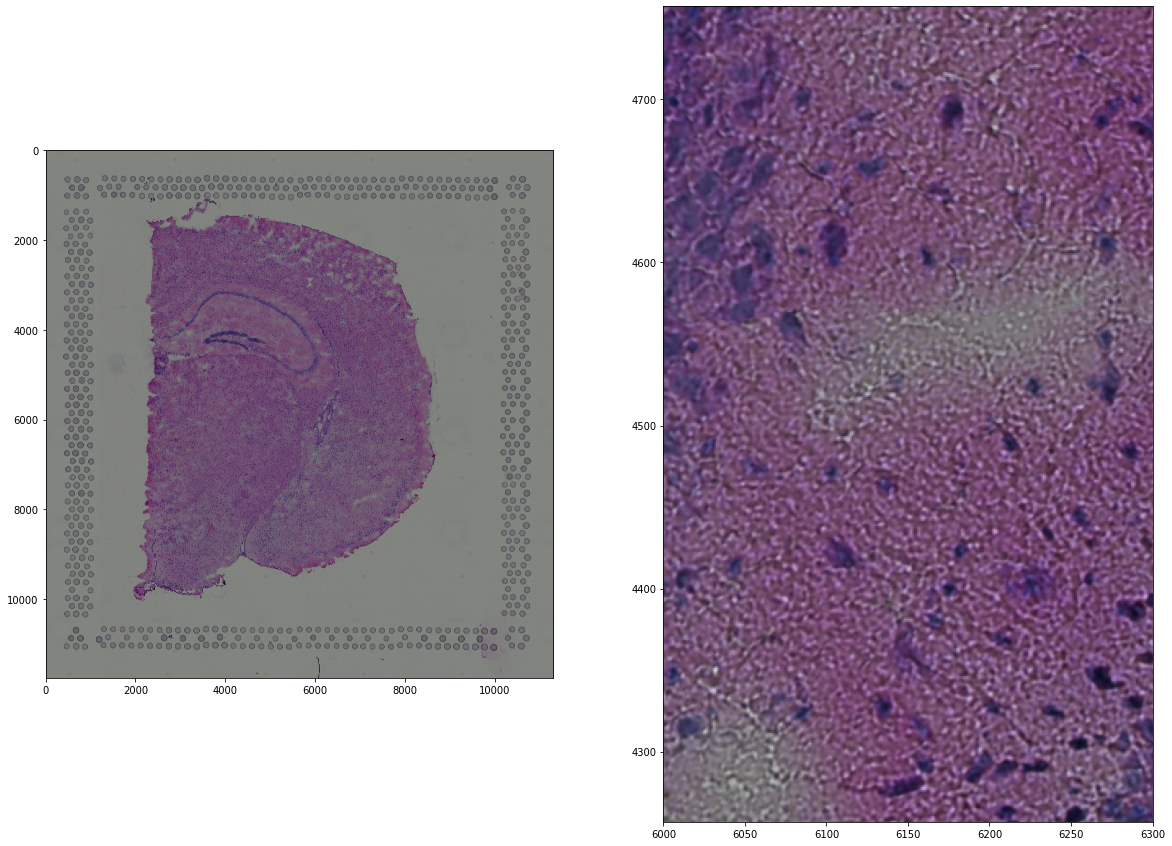

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 15))
ax[0].imshow(tiff)
ax[1].imshow(tiff)
ax[1].set_xlim(img_coord[0], img_coord[1])
ax[1].set_ylim(img_coord[3], img_coord[2])

You can find more info on how spatial coordinates relates to different resolutions in the other notebooks. For tutorials on spatial data visit the scanpy tutorial [page](https://scanpy.readthedocs.io/en/stable/tutorials.html#spatial-data)